0.01732833551285889


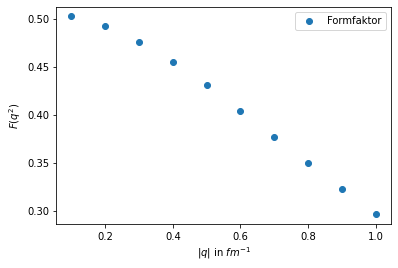

In [1]:
import numpy as np 
from numpy.polynomial.legendre import leggauss
from scipy.special import sph_harm
from scipy.interpolate import interp1d
import pylab as plt
import sys
import pandas as pd
import math as m


def formfaktor(q,l,lz,wf,pgrid,weights):
        mred=938.92/2
        hbarc=197.327
        e0=-2.225/hbarc
        neigv=1  
        formfaktor=0
        for i in range(60):
            x_integral=0
            x_grid=200
            for j in range(x_grid):
                x=-1+2*j/(x_grid-1)
                delta_x=1/(x_grid-1)
                px=pgrid[i]*np.sqrt(1-x*x)
                pz=pgrid[i]*x
                p_angle=np.arccos(pz/pgrid[i])
                mixterm_absolut=np.sqrt(px**2+(pz-0.5*q)**2)
                mixterm_angle=np.arccos((pz-0.5*q)/mixterm_absolut)
                spherical_p=sph_harm(l, lz, p_angle, 0).real
                spherical_mixedterm=sph_harm(l, lz, mixterm_angle, 0).real
                wf_p=wf[i]
                for k in range(60):
                    if(pgrid[k]>mixterm_absolut):
                        difference=pgrid[k]-mixterm_absolut
                        percent_difference=1-difference/(pgrid[k]-pgrid[k-1])
                        #print(percent_difference,i,j,q)
                        wf_mixterm=wf[k-1]+percent_difference*(wf[k]-wf[k-1])
                        break
                        
                
                x_integral+=wf_p*wf_mixterm*spherical_p*spherical_mixedterm*delta_x
            formfaktor+=2*np.pi*pgrid[i]**2*x_integral*weights[i]
        return formfaktor
        
        

filein=open("wf-obe-lam=1200.00.dat", "r")
pgrid=[]
wf=[]
weights=[]


for line in filein:
    data=line.split()
    wf.append(float(data[2]))
    weights.append(float(data[1]))
    pgrid.append(float(data[0]))

filein.close()
q=[]
form=[]
for i in range(1,11):
    q.append(i/10)
    form.append(formfaktor(q[i-1],0,0,wf,pgrid,weights))
print(formfaktor(4,0,0,wf,pgrid,weights))


plt.scatter(q,form, label=r"Formfaktor")
plt.xlabel(r'$|q|$ in $fm^{-1}$')
plt.ylabel(r'$F(q^2)$')
plt.legend()
plt.savefig('problem4.png')